In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd
import os, glob, pdb, tqdm
from openpyxl import load_workbook
from sklearn.linear_model import LassoLars

In [3]:
df = pd.read_excel(r'C:\Users\khcho\Desktop\zip.xlsx')
data = np.asarray(df)
tile = data[1:, :-2]
score = data[1:, -2]
print(tile.shape)
print(score.shape)

(8, 11)
(8,)


In [4]:
print(tile)
print(score)

[[3. 2. 4. 2. 2. 2. 1. 0. 0. 0. 0.]
 [3. 1. 3. 1. 2. 0. 0. 0. 1. 1. 0.]
 [3. 3. 1. 0. 0. 2. 1. 1. 0. 1. 0.]
 [2. 3. 2. 1. 1. 1. 0. 0. 1. 1. 0.]
 [2. 2. 1. 1. 2. 2. 0. 0. 1. 1. 0.]
 [4. 1. 4. 2. 2. 0. 1. 1. 1. 0. 0.]
 [4. 3. 3. 0. 1. 1. 0. 0. 0. 1. 0.]
 [4. 2. 1. 2. 1. 1. 0. 1. 1. 0. 0.]]
[ 950. 6902. 6300. 8302. 7536. 3838. 4752. 3160.]


In [5]:
tile_num = 2**(np.arange(tile.shape[1])+1)
tile*tile_num
total_tile = np.sum(tile*tile_num, axis=1)

In [6]:
reg = LassoLars(alpha=1, positive=True)
reg.fit(tile, score)
print(reg.coef_)

[   0.          697.21126761    0.            0.            0.
    0.         1390.47887324  110.25352113 3490.22535211 4526.53521127
    0.        ]


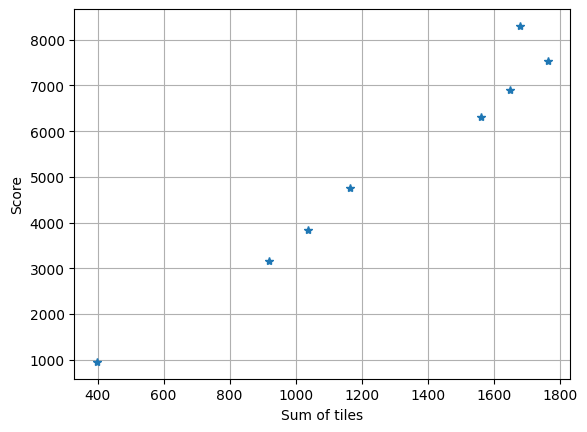

In [12]:
plt.plot(total_tile, score, ' *')
# plt.plot(score, np.matmul(tile, reg.coef_), ' *')
# plt.plot([0, 1e4], [0, 1e4], alpha=0.5)
plt.xlabel('Sum of tiles')
plt.ylabel('Score')
plt.grid()

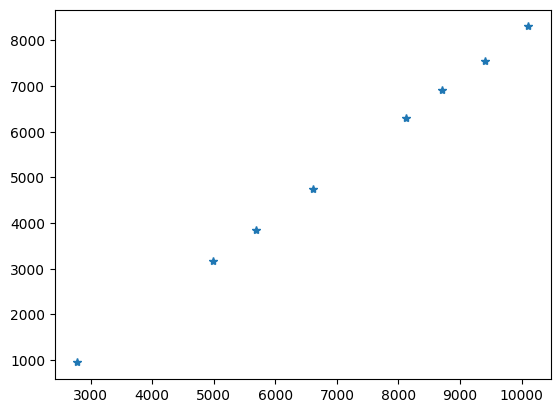

In [8]:
plt.plot(np.matmul(tile, reg.coef_), score, ' *')